# task1

In [13]:
import numpy as np

num_elements = 10

numbers = np.random.randint(1, 10**5, num_elements).tolist()
sorted_numbers = sorted(numbers)
numbers

[95271, 21525, 95004, 41333, 49092, 52646, 7889, 55593, 12297, 3395]

In [31]:
from typing import Union

def linear_search(numbers: list, num: int) -> Union[int, int]:
    num_comparisons = 0
    
    for i in range(len(numbers)):
        num_comparisons += 1
        if numbers[i] == num:
            return i, num_comparisons

    return -1, num_comparisons

def binary_search(numbers: list, num: int) -> Union[int, int]:
    num_comparisons = 0
    
    low_idx = 0
    high_idx = len(numbers) - 1

    while low_idx <= high_idx:
        middle_idx = low_idx + (high_idx - low_idx) // 2

        num_comparisons += 1
        if numbers[middle_idx] < num:
            low_idx = middle_idx + 1
        elif numbers[middle_idx] > num:
            high_idx = middle_idx - 1
        else:
            return middle_idx, num_comparisons

    return -1, num_comparisons

In [33]:
import random
import time
import numpy as np

comparison_info = []

num_tests = 100

for num_elements in [10**3, 10**4, 10**5, 10**6, 10**7]:
    numbers = np.random.randint(1, 10**5, num_elements).tolist()
    sorted_numbers = sorted(numbers)
    
    linear_run_times = []
    linear_num_comparisons = []
    
    binary_run_times = []
    binary_num_comparisons = []
    
    for _ in range(num_tests):
        num = random.choice(numbers)
        
        linear_start_time = time.perf_counter()
        _, num_comparisons = linear_search(numbers, num)
        linear_end_time = time.perf_counter()
    
        linear_run_times.append(linear_end_time - linear_start_time)
        linear_num_comparisons.append(num_comparisons)
    
        binary_start_time = time.perf_counter()
        _, num_comparisons = binary_search(sorted_numbers, num)
        binary_end_time = time.perf_counter()
    
        binary_run_times.append(binary_end_time - binary_start_time)
        binary_num_comparisons.append(num_comparisons)
    
    comparison_info.append({"num_elements": num_elements, 
     "linear_run_times_worse": max(linear_run_times),
     "linear_run_times_average": sum(linear_run_times)/num_tests,
     "linear_run_times_best": min(linear_run_times),
     "linear_num_comparisons_worse": max(linear_num_comparisons),
     "linear_num_comparisons_average": sum(linear_num_comparisons)/num_tests,
     "linear_num_comparisons_best": min(linear_num_comparisons),
     "binary_run_times_worse": max(binary_run_times),
     "binary_run_times_average": sum(binary_run_times)/num_tests,
     "binary_run_times_best": min(binary_run_times),
     "binary_num_comparisons_worse": max(binary_num_comparisons),
     "binary_num_comparisons_average": sum(binary_num_comparisons)/num_tests,
     "binary_num_comparisons_best": min(binary_num_comparisons),
    })

In [34]:
import pandas as pd

df = pd.DataFrame(comparison_info)
df

,num_elements,linear_run_times_worse,linear_run_times_average,linear_run_times_best,linear_num_comparisons_worse,linear_num_comparisons_average,linear_num_comparisons_best,binary_run_times_worse,binary_run_times_average,binary_run_times_best,binary_num_comparisons_worse,binary_num_comparisons_average,binary_num_comparisons_best
0,1000,0.000126,0.000049,9.590003e-07,996,497.37,7,0.000007,0.000003,0.000002,10,9.12,6
1,10000,0.000776,0.000293,1.624998e-06,9919,4438.73,12,0.000012,0.000004,0.000002,14,12.25,7
2,100000,0.003322,0.001038,7.112500e-05,87326,37454.27,2614,0.000007,0.000003,0.000001,17,14.71,8
3,1000000,0.015759,0.002180,2.829201e-05,575528,84223.42,1082,0.000006,0.000003,0.000002,18,15.54,8
4,10000000,0.008287,0.002019,4.583300e-05,314831,75663.08,1844,0.000009,0.000004,0.000002,17,15.62,9


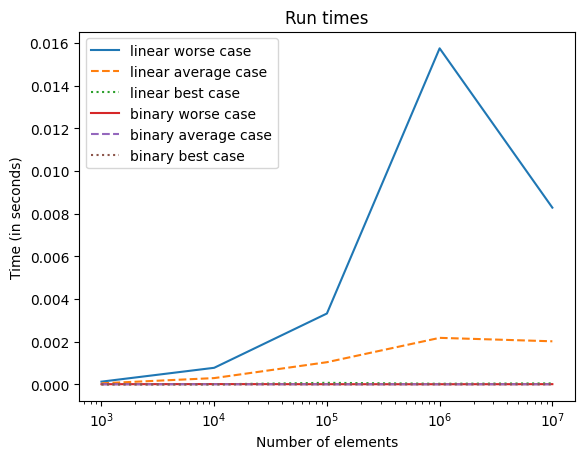

In [37]:
import matplotlib.pyplot as plt

for search_type in ['linear', 'binary']:
    for case, linestyle in [('worse', '-'), ('average', '--'), ('best', ':')]:
        plt.semilogx('num_elements', f'{search_type}_run_times_{case}', data=df, 
                     label = f"{search_type} {case} case", linestyle = linestyle)

plt.title("Run times")
plt.xlabel("Number of elements")
plt.ylabel("Time (in seconds)")
plt.legend()
plt.show();

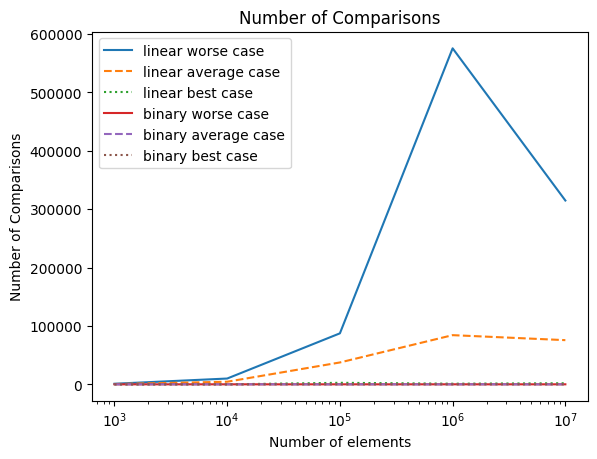

In [38]:
import matplotlib.pyplot as plt

for search_type in ['linear', 'binary']:
    for case, linestyle in [('worse', '-'), ('average', '--'), ('best', ':')]:
        plt.semilogx('num_elements', f'{search_type}_num_comparisons_{case}', data=df, 
                     label = f"{search_type} {case} case", linestyle = linestyle)

plt.title("Number of Comparisons")
plt.xlabel("Number of elements")
plt.ylabel("Number of Comparisons")
plt.legend()
plt.show();

# task2

In [44]:
from typing import Union

def brute_force_search(numbers: list, target: int) -> Union[int, int, int]:
    num_comparisons = 0
    n = len(numbers)
    
    for i in range(n):
        for j in range(i):
            num_comparisons += 1
            if numbers[i] + numbers[j] == target:
                return j, i, num_comparisons
    
    return -1, -1, num_comparisons

brute_force_search(numbers, target)

(-1, -1, 45)

In [58]:
def binary_search(numbers: list, num: int) -> Union[int, int]:
    num_comparisons = 0
    
    low_idx = 0
    high_idx = len(numbers) - 1

    while low_idx <= high_idx:
        middle_idx = low_idx + (high_idx - low_idx) // 2

        num_comparisons += 1
        if numbers[middle_idx] < num:
            low_idx = middle_idx + 1
        elif numbers[middle_idx] > num:
            high_idx = middle_idx - 1
        else:
            return middle_idx, num_comparisons

    return -1, num_comparisons

def optimized_search(numbers: list, target: int) -> Union[int, int, int]:
    num_comparisons = 0

    n = len(numbers)

    for i in range(n):
        complement = target - numbers[i]
        j, num_comps = binary_search(numbers[:i], complement)

        num_comparisons += num_comps

        if j>= 0:
            return j, i, num_comparisons

    return -1, -1, num_comparisons

In [62]:
import random
import time
import numpy as np

comparison_info = []

num_tests = 100

for num_elements in [10**2, 10**3, 10**4]:
    numbers = np.random.randint(1, 10**5, num_elements).tolist()
    sorted_numbers = sorted(numbers)
    
    brute_force_run_times = []
    brute_force_num_comparisons = []
    
    optimized_run_times = []
    optimized_num_comparisons = []
    
    for _ in range(num_tests):
        num = random.choice(range(10**6))
        
        brute_force_start_time = time.perf_counter()
        _, _, num_comparisons = brute_force_search(numbers, num)
        brute_force_end_time = time.perf_counter()
    
        brute_force_run_times.append(brute_force_end_time - brute_force_start_time)
        brute_force_num_comparisons.append(num_comparisons)
    
        optimized_start_time = time.perf_counter()
        _, _, num_comparisons = optimized_search(sorted_numbers, num)
        optimized_end_time = time.perf_counter()
    
        optimized_run_times.append(optimized_end_time - optimized_start_time)
        optimized_num_comparisons.append(num_comparisons)
    
    comparison_info.append({"num_elements": num_elements, 
     "brute_force_run_times_average": sum(brute_force_run_times)/num_tests,
     "brute_force_num_comparisons_average": sum(brute_force_num_comparisons)/num_tests,
     "optimized_run_times_average": sum(optimized_run_times)/num_tests,
     "optimized_num_comparisons_average": sum(optimized_num_comparisons)/num_tests,
    })

In [63]:
import pandas as pd

df = pd.DataFrame(comparison_info)
df

,num_elements,brute_force_run_times_average,brute_force_num_comparisons_average,optimized_run_times_average,optimized_num_comparisons_average
0,100,0.000413,4950.00,0.000110,567.33
1,1000,0.016481,434965.06,0.000924,8311.84
2,10000,1.662469,41613853.70,0.085575,114891.09


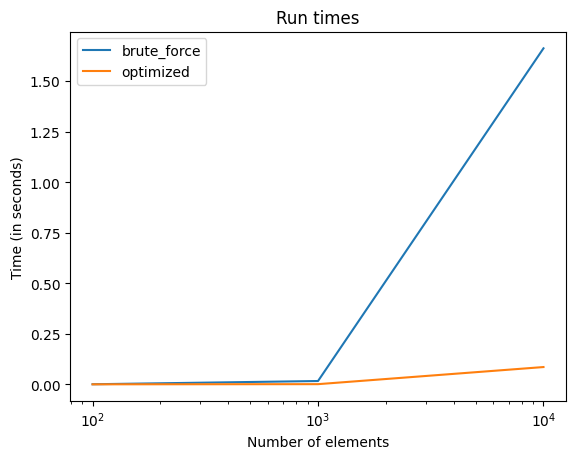

In [64]:
import matplotlib.pyplot as plt

for search_type in ['brute_force', 'optimized']:
        plt.semilogx('num_elements', f'{search_type}_run_times_average', data=df, 
                     label = f"{search_type}")

plt.title("Run times")
plt.xlabel("Number of elements")
plt.ylabel("Time (in seconds)")
plt.legend()
plt.show();

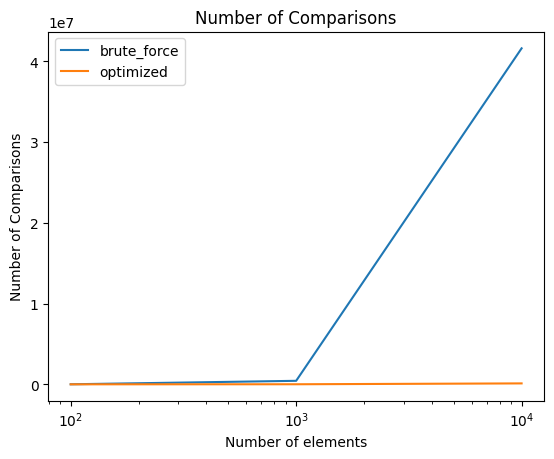

In [66]:
import matplotlib.pyplot as plt

for search_type in ['brute_force', 'optimized']:
        plt.semilogx('num_elements', f'{search_type}_num_comparisons_average', data=df, 
                     label = f"{search_type}")

plt.title("Number of Comparisons")
plt.xlabel("Number of elements")
plt.ylabel("Number of Comparisons")
plt.legend()
plt.show();